In [ ]:
!pip3 install opencv-python

In [71]:
# import cv2
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from glob import glob
from pprint import pprint
from collections import defaultdict
import gc

from skimage import io, exposure, feature
from skimage.transform import rescale
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Exploring Image data

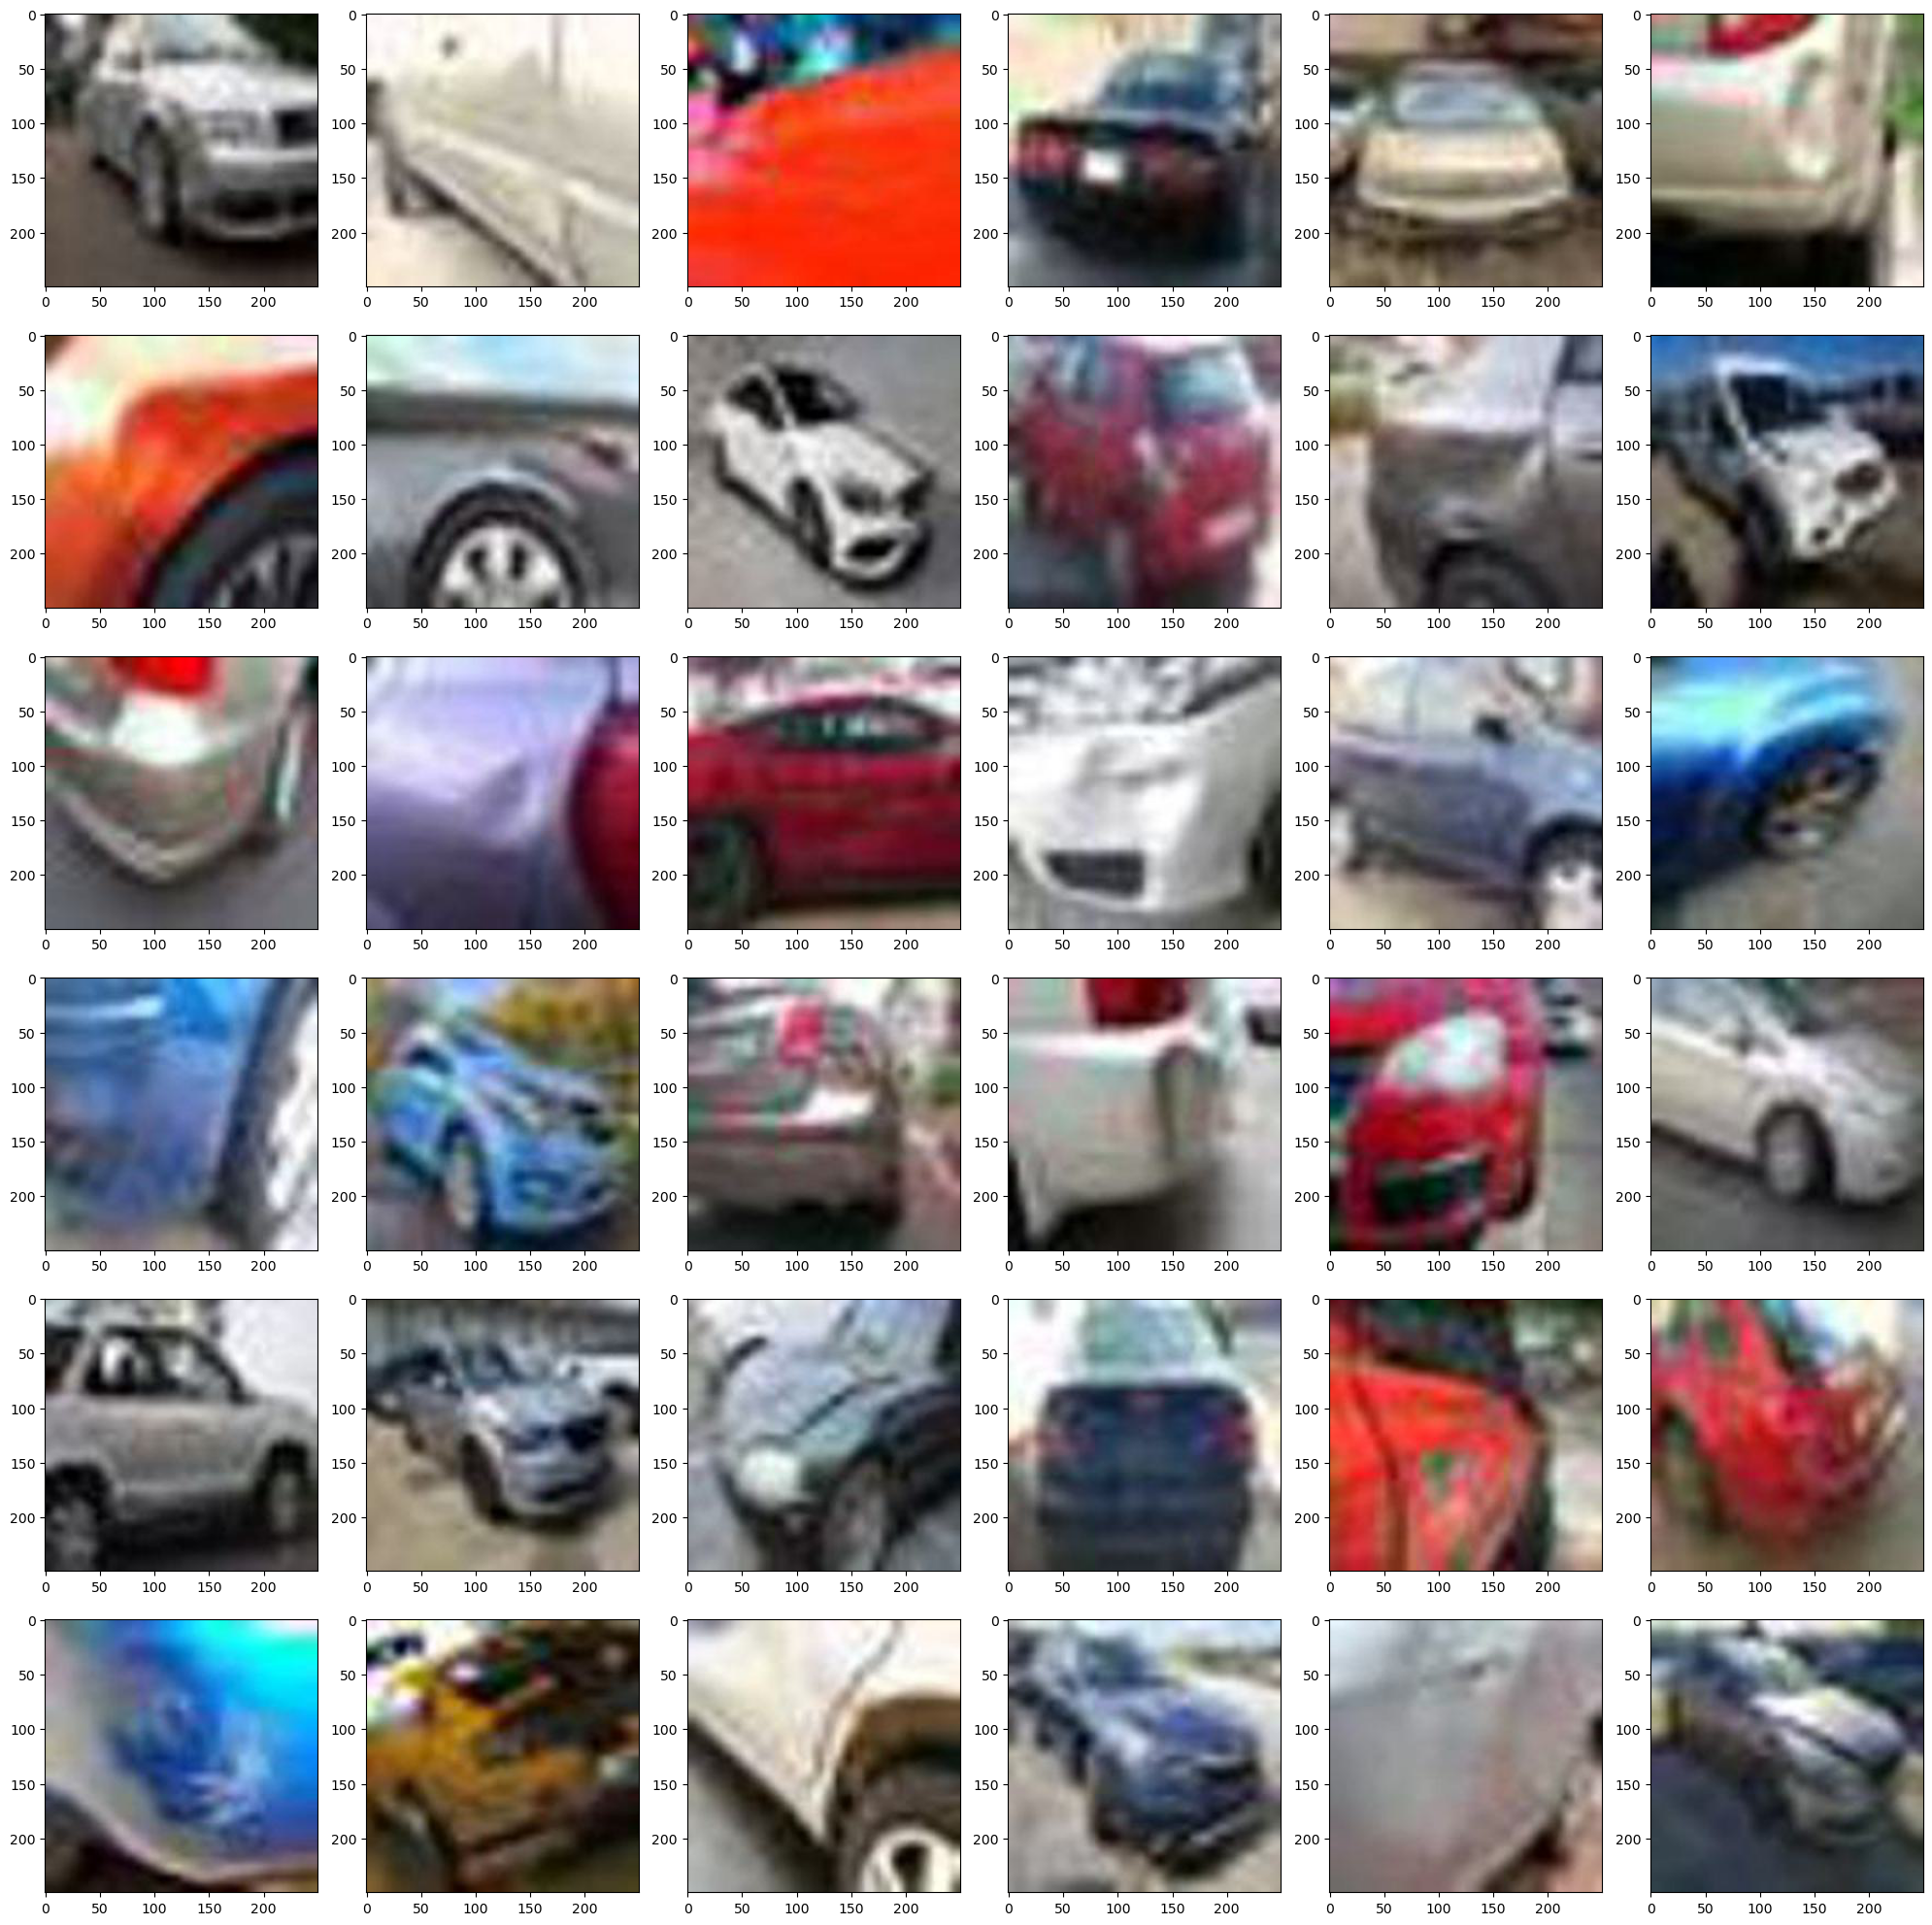

In [2]:
training_ = glob("/Users/lizzettesalmeron/Development/machine-learning-dse-i210-final-project-damageseveritydetection/data/interim/data3a/training/01-minor/*")
fig, axes = plt.subplots(6,6, figsize=(20,20))
axes = axes.flatten()

for i in range(36):
    img = Image.open(training_[i])
    axes[i].imshow(img)
plt.tight_layout()
plt.show()

## _To Do: EDA on image data, try to see if there are any resources that uses csv data, if not, use another method_

# Converting images to csv files

 - converting to greyscale
 - resizing images to  28x28

In [3]:
# IMG_DIR = 

# for img in os.listdir(IMG_DIR):
#     img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

#     img_pil = Image.fromarray(img_array)
#     img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

#     img_array = (img_28x28.flatten())

#     img_array  = img_array.reshape(-1,1).T

#     with open('train_01_minor.csv', 'ab') as f:

#         np.savetxt(f, img_array, delimiter=",")

In [4]:
# IMG_DIR = 

# for img in os.listdir(IMG_DIR):
#     img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

#     img_pil = Image.fromarray(img_array)
#     img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

#     img_array = (img_28x28.flatten())

#     img_array  = img_array.reshape(-1,1).T

#     with open('train_02_moderate.csv', 'ab') as f:

#         np.savetxt(f, img_array, delimiter=",")

In [5]:
# IMG_DIR = 

# for img in os.listdir(IMG_DIR):
#     img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

#     img_pil = Image.fromarray(img_array)
#     img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

#     img_array = (img_28x28.flatten())

#     img_array  = img_array.reshape(-1,1).T

#     with open('train_03_severe.csv', 'ab') as f:

#         np.savetxt(f, img_array, delimiter=",")

In [6]:
# train_minor = pd.read_csv("train_01_minor.csv", header=None)

# column_names = {}
# count = 0
# for i in train_minor.columns:
#   count += 1
#   column_names[i] = f"Pix_{count}"
# train_minor.rename(columns=columnnames ,inplace = True)

# train_minor['label'] = 0

In [7]:
# train_moderate = pd.read_csv("train_02_moderate.csv", header=None)

# column_names = {}
# count = 0
# for i in train_moderate.columns:
#   count += 1
#   column_names[i] = f"Pix_{count}"
# train_moderate.rename(columns=column_names, inplace=True)


# train_moderate['label'] = 1

In [8]:
# train_severe = pd.read_csv("train_03_severe.csv", header=None)

# column_names = {}
# count = 0
# for i in train_severe.columns:
#   count += 1
#   column_names[i] = f"Pix_{count}"
# train_severe.rename(columns=column_names, inplace=True)

# train_severe['label'] = 2

In [9]:
# df_t = pd.concat([train_minor, train_moderate, train_severe])
# df_t.shape

In [10]:
# df_t.to_csv('training_data.csv')

# Exploring image-to-csv files

In [11]:
training_csv_path = '/Users/lizzettesalmeron/Development/machine-learning-dse-i210-final-project-damageseveritydetection/data/training_data.csv'
validation_csv_path = '/Users/lizzettesalmeron/Development/machine-learning-dse-i210-final-project-damageseveritydetection/data/validation_data.csv'

df_t = pd.read_csv(training_csv_path, index_col=0)
df_v = pd.read_csv(validation_csv_path, index_col=0)


In [12]:
print('training columns: ', df_t.columns)
print('validation columns: ', df_v.columns)

training columns:  Index(['Pix_1', 'Pix_2', 'Pix_3', 'Pix_4', 'Pix_5', 'Pix_6', 'Pix_7', 'Pix_8',
       'Pix_9', 'Pix_10',
       ...
       'Pix_776', 'Pix_777', 'Pix_778', 'Pix_779', 'Pix_780', 'Pix_781',
       'Pix_782', 'Pix_783', 'Pix_784', 'label'],
      dtype='object', length=785)
validation columns:  Index(['Pix_1', 'Pix_2', 'Pix_3', 'Pix_4', 'Pix_5', 'Pix_6', 'Pix_7', 'Pix_8',
       'Pix_9', 'Pix_10',
       ...
       'Pix_776', 'Pix_777', 'Pix_778', 'Pix_779', 'Pix_780', 'Pix_781',
       'Pix_782', 'Pix_783', 'Pix_784', 'label'],
      dtype='object', length=785)


In [13]:
print(df_t.isnull().sum())
print(df_v.isnull().sum())

Pix_1      0
Pix_2      0
Pix_3      0
Pix_4      0
Pix_5      0
          ..
Pix_781    0
Pix_782    0
Pix_783    0
Pix_784    0
label      0
Length: 785, dtype: int64
Pix_1      0
Pix_2      0
Pix_3      0
Pix_4      0
Pix_5      0
          ..
Pix_781    0
Pix_782    0
Pix_783    0
Pix_784    0
label      0
Length: 785, dtype: int64


In [14]:
print('training df shape:', df_t.shape, ', Split Percentage: ~82.07%')
print('validation df shape', df_v.shape, ', Split Percentage: ~17.93%' )

training df shape: (1383, 785) , Split Percentage: ~82.07%
validation df shape (248, 785) , Split Percentage: ~17.93%


In [15]:
df_t.head(-10)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,165.0,165.0,164.0,165.0,166.0,162.0,203.0,150.0,152.0,171.0,...,98.0,96.0,94.0,114.0,124.0,128.0,100.0,106.0,93.0,0
1,60.0,77.0,103.0,115.0,143.0,144.0,148.0,152.0,154.0,155.0,...,121.0,123.0,116.0,111.0,112.0,105.0,106.0,102.0,99.0,0
2,171.0,207.0,150.0,114.0,142.0,121.0,97.0,50.0,51.0,61.0,...,104.0,104.0,106.0,111.0,112.0,111.0,116.0,114.0,115.0,0
3,117.0,115.0,112.0,111.0,108.0,105.0,97.0,76.0,64.0,56.0,...,47.0,57.0,76.0,93.0,87.0,81.0,96.0,138.0,190.0,0
4,107.0,105.0,98.0,113.0,116.0,107.0,109.0,115.0,105.0,114.0,...,42.0,43.0,45.0,48.0,46.0,47.0,104.0,126.0,118.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,248.0,247.0,250.0,250.0,250.0,250.0,249.0,250.0,251.0,252.0,...,73.0,75.0,81.0,83.0,87.0,110.0,174.0,203.0,212.0,2
454,131.0,134.0,184.0,144.0,123.0,146.0,158.0,223.0,202.0,250.0,...,133.0,152.0,149.0,143.0,149.0,139.0,147.0,162.0,174.0,2
455,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,252.0,252.0,252.0,255.0,255.0,255.0,255.0,2
456,219.0,221.0,165.0,134.0,103.0,121.0,87.0,41.0,168.0,182.0,...,249.0,219.0,182.0,170.0,169.0,173.0,172.0,172.0,171.0,2


In [16]:
df_v.head(-10)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,90.0,96.0,45.0,8.0,13.0,11.0,10.0,15.0,29.0,27.0,...,14.0,25.0,37.0,26.0,22.0,24.0,19.0,18.0,25.0,0
1,142.0,168.0,168.0,176.0,183.0,181.0,182.0,178.0,181.0,182.0,...,30.0,35.0,30.0,32.0,36.0,45.0,48.0,42.0,54.0,0
2,196.0,206.0,206.0,206.0,205.0,203.0,202.0,201.0,200.0,199.0,...,123.0,122.0,120.0,121.0,120.0,122.0,122.0,122.0,121.0,0
3,90.0,80.0,89.0,61.0,70.0,86.0,147.0,80.0,107.0,123.0,...,99.0,97.0,95.0,95.0,94.0,93.0,94.0,94.0,94.0,0
4,40.0,73.0,68.0,61.0,70.0,57.0,142.0,157.0,151.0,151.0,...,49.0,49.0,46.0,43.0,40.0,39.0,38.0,37.0,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,226.0,152.0,170.0,170.0,168.0,248.0,224.0,224.0,155.0,141.0,...,135.0,134.0,144.0,152.0,157.0,159.0,154.0,142.0,133.0,2
234,20.0,22.0,29.0,29.0,25.0,23.0,23.0,27.0,28.0,29.0,...,166.0,165.0,164.0,163.0,162.0,160.0,158.0,157.0,152.0,2
235,209.0,223.0,224.0,250.0,255.0,223.0,218.0,233.0,190.0,181.0,...,174.0,164.0,156.0,163.0,161.0,163.0,132.0,141.0,153.0,2
236,194.0,190.0,189.0,190.0,170.0,130.0,181.0,194.0,195.0,193.0,...,33.0,35.0,34.0,41.0,46.0,45.0,40.0,34.0,31.0,2


### *_Why is there a 3 in the label columns for the training and validation csv?_*

In [17]:
df_t['label'] = df_t['label'].replace(3, 2)
df_t.head(-10)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,165.0,165.0,164.0,165.0,166.0,162.0,203.0,150.0,152.0,171.0,...,98.0,96.0,94.0,114.0,124.0,128.0,100.0,106.0,93.0,0
1,60.0,77.0,103.0,115.0,143.0,144.0,148.0,152.0,154.0,155.0,...,121.0,123.0,116.0,111.0,112.0,105.0,106.0,102.0,99.0,0
2,171.0,207.0,150.0,114.0,142.0,121.0,97.0,50.0,51.0,61.0,...,104.0,104.0,106.0,111.0,112.0,111.0,116.0,114.0,115.0,0
3,117.0,115.0,112.0,111.0,108.0,105.0,97.0,76.0,64.0,56.0,...,47.0,57.0,76.0,93.0,87.0,81.0,96.0,138.0,190.0,0
4,107.0,105.0,98.0,113.0,116.0,107.0,109.0,115.0,105.0,114.0,...,42.0,43.0,45.0,48.0,46.0,47.0,104.0,126.0,118.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,248.0,247.0,250.0,250.0,250.0,250.0,249.0,250.0,251.0,252.0,...,73.0,75.0,81.0,83.0,87.0,110.0,174.0,203.0,212.0,2
454,131.0,134.0,184.0,144.0,123.0,146.0,158.0,223.0,202.0,250.0,...,133.0,152.0,149.0,143.0,149.0,139.0,147.0,162.0,174.0,2
455,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,252.0,252.0,252.0,255.0,255.0,255.0,255.0,2
456,219.0,221.0,165.0,134.0,103.0,121.0,87.0,41.0,168.0,182.0,...,249.0,219.0,182.0,170.0,169.0,173.0,172.0,172.0,171.0,2


### *_Export new training csv file with updated label changes_*

In [18]:
df_t.to_csv('training_data.csv')

# Combine training + validation .csv files

### Group decided to redo the baseline models using the combined version of the training and validation image data

In [30]:
files = [training_csv_path, validation_csv_path]
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], ignore_index=True)
df.to_csv('combined_data.csv')

In [35]:
combined_csv_path = '/Users/lizzettesalmeron/Development/machine-learning-dse-i210-final-project-damageseveritydetection/data/combined_data.csv'
df = pd.read_csv(combined_csv_path, index_col=0)
df.head(-10)

,Unnamed: 0,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,0,165.0,165.0,164.0,165.0,166.0,162.0,203.0,150.0,152.0,...,98.0,96.0,94.0,114.0,124.0,128.0,100.0,106.0,93.0,0
1,1,60.0,77.0,103.0,115.0,143.0,144.0,148.0,152.0,154.0,...,121.0,123.0,116.0,111.0,112.0,105.0,106.0,102.0,99.0,0
2,2,171.0,207.0,150.0,114.0,142.0,121.0,97.0,50.0,51.0,...,104.0,104.0,106.0,111.0,112.0,111.0,116.0,114.0,115.0,0
3,3,117.0,115.0,112.0,111.0,108.0,105.0,97.0,76.0,64.0,...,47.0,57.0,76.0,93.0,87.0,81.0,96.0,138.0,190.0,0
4,4,107.0,105.0,98.0,113.0,116.0,107.0,109.0,115.0,105.0,...,42.0,43.0,45.0,48.0,46.0,47.0,104.0,126.0,118.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,233,226.0,152.0,170.0,170.0,168.0,248.0,224.0,224.0,155.0,...,135.0,134.0,144.0,152.0,157.0,159.0,154.0,142.0,133.0,2
1617,234,20.0,22.0,29.0,29.0,25.0,23.0,23.0,27.0,28.0,...,166.0,165.0,164.0,163.0,162.0,160.0,158.0,157.0,152.0,2
1618,235,209.0,223.0,224.0,250.0,255.0,223.0,218.0,233.0,190.0,...,174.0,164.0,156.0,163.0,161.0,163.0,132.0,141.0,153.0,2
1619,236,194.0,190.0,189.0,190.0,170.0,130.0,181.0,194.0,195.0,...,33.0,35.0,34.0,41.0,46.0,45.0,40.0,34.0,31.0,2


In [36]:
df.keys()

Index(['Unnamed: 0', 'Pix_1', 'Pix_2', 'Pix_3', 'Pix_4', 'Pix_5', 'Pix_6',
       'Pix_7', 'Pix_8', 'Pix_9',
       ...
       'Pix_776', 'Pix_777', 'Pix_778', 'Pix_779', 'Pix_780', 'Pix_781',
       'Pix_782', 'Pix_783', 'Pix_784', 'label'],
      dtype='object', length=786)

In [37]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(-10)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,165.0,165.0,164.0,165.0,166.0,162.0,203.0,150.0,152.0,171.0,...,98.0,96.0,94.0,114.0,124.0,128.0,100.0,106.0,93.0,0
1,60.0,77.0,103.0,115.0,143.0,144.0,148.0,152.0,154.0,155.0,...,121.0,123.0,116.0,111.0,112.0,105.0,106.0,102.0,99.0,0
2,171.0,207.0,150.0,114.0,142.0,121.0,97.0,50.0,51.0,61.0,...,104.0,104.0,106.0,111.0,112.0,111.0,116.0,114.0,115.0,0
3,117.0,115.0,112.0,111.0,108.0,105.0,97.0,76.0,64.0,56.0,...,47.0,57.0,76.0,93.0,87.0,81.0,96.0,138.0,190.0,0
4,107.0,105.0,98.0,113.0,116.0,107.0,109.0,115.0,105.0,114.0,...,42.0,43.0,45.0,48.0,46.0,47.0,104.0,126.0,118.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,226.0,152.0,170.0,170.0,168.0,248.0,224.0,224.0,155.0,141.0,...,135.0,134.0,144.0,152.0,157.0,159.0,154.0,142.0,133.0,2
1617,20.0,22.0,29.0,29.0,25.0,23.0,23.0,27.0,28.0,29.0,...,166.0,165.0,164.0,163.0,162.0,160.0,158.0,157.0,152.0,2
1618,209.0,223.0,224.0,250.0,255.0,223.0,218.0,233.0,190.0,181.0,...,174.0,164.0,156.0,163.0,161.0,163.0,132.0,141.0,153.0,2
1619,194.0,190.0,189.0,190.0,170.0,130.0,181.0,194.0,195.0,193.0,...,33.0,35.0,34.0,41.0,46.0,45.0,40.0,34.0,31.0,2


In [38]:
df.to_csv('combined_data.csv')

# Baseline Models

In [39]:
df.shape

(1631, 785)

In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
X.head(-10)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_775,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784
0,165.0,165.0,164.0,165.0,166.0,162.0,203.0,150.0,152.0,171.0,...,166.0,98.0,96.0,94.0,114.0,124.0,128.0,100.0,106.0,93.0
1,60.0,77.0,103.0,115.0,143.0,144.0,148.0,152.0,154.0,155.0,...,123.0,121.0,123.0,116.0,111.0,112.0,105.0,106.0,102.0,99.0
2,171.0,207.0,150.0,114.0,142.0,121.0,97.0,50.0,51.0,61.0,...,95.0,104.0,104.0,106.0,111.0,112.0,111.0,116.0,114.0,115.0
3,117.0,115.0,112.0,111.0,108.0,105.0,97.0,76.0,64.0,56.0,...,43.0,47.0,57.0,76.0,93.0,87.0,81.0,96.0,138.0,190.0
4,107.0,105.0,98.0,113.0,116.0,107.0,109.0,115.0,105.0,114.0,...,38.0,42.0,43.0,45.0,48.0,46.0,47.0,104.0,126.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,226.0,152.0,170.0,170.0,168.0,248.0,224.0,224.0,155.0,141.0,...,134.0,135.0,134.0,144.0,152.0,157.0,159.0,154.0,142.0,133.0
1617,20.0,22.0,29.0,29.0,25.0,23.0,23.0,27.0,28.0,29.0,...,167.0,166.0,165.0,164.0,163.0,162.0,160.0,158.0,157.0,152.0
1618,209.0,223.0,224.0,250.0,255.0,223.0,218.0,233.0,190.0,181.0,...,166.0,174.0,164.0,156.0,163.0,161.0,163.0,132.0,141.0,153.0
1619,194.0,190.0,189.0,190.0,170.0,130.0,181.0,194.0,195.0,193.0,...,34.0,33.0,35.0,34.0,41.0,46.0,45.0,40.0,34.0,31.0


In [44]:
y.head(-10)

0       0
1       0
2       0
3       0
4       0
       ..
1616    2
1617    2
1618    2
1619    2
1620    2
Name: label, Length: 1621, dtype: int64

In [45]:
X_norm = X/255.0
y_norm = y/255.0

In [46]:
X_norm.head(-10)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_775,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784
0,0.647059,0.647059,0.643137,0.647059,0.650980,0.635294,0.796078,0.588235,0.596078,0.670588,...,0.650980,0.384314,0.376471,0.368627,0.447059,0.486275,0.501961,0.392157,0.415686,0.364706
1,0.235294,0.301961,0.403922,0.450980,0.560784,0.564706,0.580392,0.596078,0.603922,0.607843,...,0.482353,0.474510,0.482353,0.454902,0.435294,0.439216,0.411765,0.415686,0.400000,0.388235
2,0.670588,0.811765,0.588235,0.447059,0.556863,0.474510,0.380392,0.196078,0.200000,0.239216,...,0.372549,0.407843,0.407843,0.415686,0.435294,0.439216,0.435294,0.454902,0.447059,0.450980
3,0.458824,0.450980,0.439216,0.435294,0.423529,0.411765,0.380392,0.298039,0.250980,0.219608,...,0.168627,0.184314,0.223529,0.298039,0.364706,0.341176,0.317647,0.376471,0.541176,0.745098
4,0.419608,0.411765,0.384314,0.443137,0.454902,0.419608,0.427451,0.450980,0.411765,0.447059,...,0.149020,0.164706,0.168627,0.176471,0.188235,0.180392,0.184314,0.407843,0.494118,0.462745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,0.886275,0.596078,0.666667,0.666667,0.658824,0.972549,0.878431,0.878431,0.607843,0.552941,...,0.525490,0.529412,0.525490,0.564706,0.596078,0.615686,0.623529,0.603922,0.556863,0.521569
1617,0.078431,0.086275,0.113725,0.113725,0.098039,0.090196,0.090196,0.105882,0.109804,0.113725,...,0.654902,0.650980,0.647059,0.643137,0.639216,0.635294,0.627451,0.619608,0.615686,0.596078
1618,0.819608,0.874510,0.878431,0.980392,1.000000,0.874510,0.854902,0.913725,0.745098,0.709804,...,0.650980,0.682353,0.643137,0.611765,0.639216,0.631373,0.639216,0.517647,0.552941,0.600000
1619,0.760784,0.745098,0.741176,0.745098,0.666667,0.509804,0.709804,0.760784,0.764706,0.756863,...,0.133333,0.129412,0.137255,0.133333,0.160784,0.180392,0.176471,0.156863,0.133333,0.121569


In [47]:
y_norm.head(-10)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1616    0.007843
1617    0.007843
1618    0.007843
1619    0.007843
1620    0.007843
Name: label, Length: 1621, dtype: float64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm, y_norm, test_size=0.25, random_state=42)

# Quick Initial Comparison

In [95]:
def run_model_comparison(X_train, y_train, X_test, y_test):
    dfs = []
    models = [
        ('LogReg', LogisticRegression()), 
        ('DT', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('GNB', GaussianNB()),
#           ('XGB', XGBClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_labels = ['0', '1', '2']
    
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_labels))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

In [96]:
import warnings
warnings.filterwarnings('ignore')

### Data not Normalized

In [100]:
df_compare = run_model_comparison(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.39      0.40      0.39       136
           1       0.32      0.38      0.35       120
           2       0.44      0.37      0.40       152

    accuracy                           0.38       408
   macro avg       0.38      0.38      0.38       408
weighted avg       0.39      0.38      0.38       408

DT
              precision    recall  f1-score   support

           0       0.44      0.45      0.45       136
           1       0.31      0.38      0.34       120
           2       0.47      0.39      0.42       152

    accuracy                           0.40       408
   macro avg       0.41      0.40      0.40       408
weighted avg       0.41      0.40      0.41       408

RF
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       136
           1       0.35      0.36      0.36       120
           2       0.49      0.51      0.50       152

    acc

In [98]:
# df_compare

### Normalized --> Gives error

In [99]:
# run_model_comparison(X_train_n, y_train_n, X_test_n, y_test_n)

### Observations: 
The models with the best performace from best to least are:
 - RF — accuracy: 46%
 - SVM — accuracy: 45%
 - GNB — accuracy: 43%
 - DT — accuracy: 40%
 - LogReg — accuracy: 38%
 - KNN — accuracy: 36%
 
### _Will incorportate grid search in next comparison_